<a href="https://colab.research.google.com/github/SainavyaGadde/DataScienceFinalProject/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from google.colab import drive

# Mount Google Drive to access files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
import pandas as pd
import numpy as np


import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt



import warnings
warnings.filterwarnings("ignore")

#save the csv file in google drive location
file_name = '/content/sample_data/household_power_consumption.csv'

# Read the data from the downloaded CSV file
energy_consumption = pd.read_csv(file_name)

df = pd.read_csv(file_name, na_values = ['nan','?'])#.sample(200000).reset_index(drop=True)

#display the first few rows of of the data
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [31]:
# check the sample
df.sample(4)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
285496,2/7/2007,23:40:00,0.222,0.000,241.28,1.0,0.0,1.0,0.0
718203,28/4/2008,11:27:00,0.788,0.228,241.30,3.4,0.0,1.0,0.0
78390,9/2/2007,3:54:00,0.286,0.084,245.34,1.2,0.0,0.0,0.0
995324,6/11/2008,22:08:00,3.008,0.162,234.53,12.8,37.0,0.0,0.0


In [32]:
# check size of data
df.shape

(1048575, 9)

In [33]:
# check data types
df.dtypes

,0
Date,object
Time,object
Global_active_power,float64
Global_reactive_power,float64
Voltage,float64
Global_intensity,float64
Sub_metering_1,float64
Sub_metering_2,float64
Sub_metering_3,float64


In [34]:
# check na
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,4069
Global_reactive_power,4069
Voltage,4069
Global_intensity,4069
Sub_metering_1,4069
Sub_metering_2,4069
Sub_metering_3,4069


In [35]:
# percentage of na
df.isna().sum()/df.shape[0]

,0
Date,0.000000
Time,0.000000
Global_active_power,0.003881
Global_reactive_power,0.003881
Voltage,0.003881
Global_intensity,0.003881
Sub_metering_1,0.003881
Sub_metering_2,0.003881
Sub_metering_3,0.003881


In [36]:
# check the na values
df[df.isna().any(axis=1)]

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
6839,21/12/2006,11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6840,21/12/2006,11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19724,30/12/2006,10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19725,30/12/2006,10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41832,14/1/2007,18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1043669,10/12/2008,11:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043670,10/12/2008,11:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043671,10/12/2008,11:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1043672,10/12/2008,11:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# drop all nans
df.dropna(inplace=True)

In [38]:
# check if there are other nas
df.isna().any()

,0
Date,False
Time,False
Global_active_power,False
Global_reactive_power,False
Voltage,False
Global_intensity,False
Sub_metering_1,False
Sub_metering_2,False
Sub_metering_3,False


In [39]:
# Convert Date and Time into a single datetime column
df['datetime'] = pd.to_datetime(df['Date'].astype(str) + ' ' + df['Time'].astype(str), format="%d/%m/%Y %H:%M:%S")


In [40]:
# Drop the date and Time column since we can get them on column created
df.drop(columns=["Date", "Time"], inplace=True)


In [41]:
# create some additional data
df["month"] = df["datetime"].dt.month
df["year"] = df["datetime"].dt.year
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour
df["dayofyear"] = df["datetime"].dt.dayofyear
df["dayname"] = df["datetime"].dt.day_name()


In [42]:
# for the purpose of analysis, create year-month column from datetime
df["year_month"] = df["datetime"].dt.strftime("%Y-%b")

In [43]:
# check sample
df.sample(4)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,datetime,month,year,day,hour,dayofyear,dayname,year_month
323977,0.262,0.214,235.08,1.4,0.0,0.0,0.0,2007-07-29 17:01:00,7,2007,29,17,210,Sunday,2007-Jul
640536,0.218,0.000,244.19,0.8,0.0,0.0,0.0,2008-03-05 13:00:00,3,2008,5,13,65,Wednesday,2008-Mar
578975,1.400,0.072,233.64,6.0,0.0,0.0,0.0,2008-01-22 18:59:00,1,2008,22,18,22,Tuesday,2008-Jan
820234,1.866,0.238,239.07,7.8,0.0,1.0,19.0,2008-07-08 07:58:00,7,2008,8,7,190,Tuesday,2008-Jul


In [44]:
# check the max between date ranges to obrserve when it starts and ends
df["datetime"].min(), df["datetime"].max()

(Timestamp('2006-12-16 17:24:00'), Timestamp('2008-12-13 21:38:00'))

In [45]:
data = df.copy()


data = data.sort_values(by="year_month").reset_index(drop=True)


In [47]:
# data
def plot_monthly_data(meaned_data, title, color, col, subplot_position):
    plt.subplot(subplot_position)
    meaned_data_sorted = meaned_data.sort_index(ascending=True)
    meaned_data_sorted.plot(kind='line', color=color, marker='o')
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Month', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.xticks(ticks=range(len(meaned_data_sorted)), labels=meaned_data_sorted.index, rotation=45, fontsize=10)


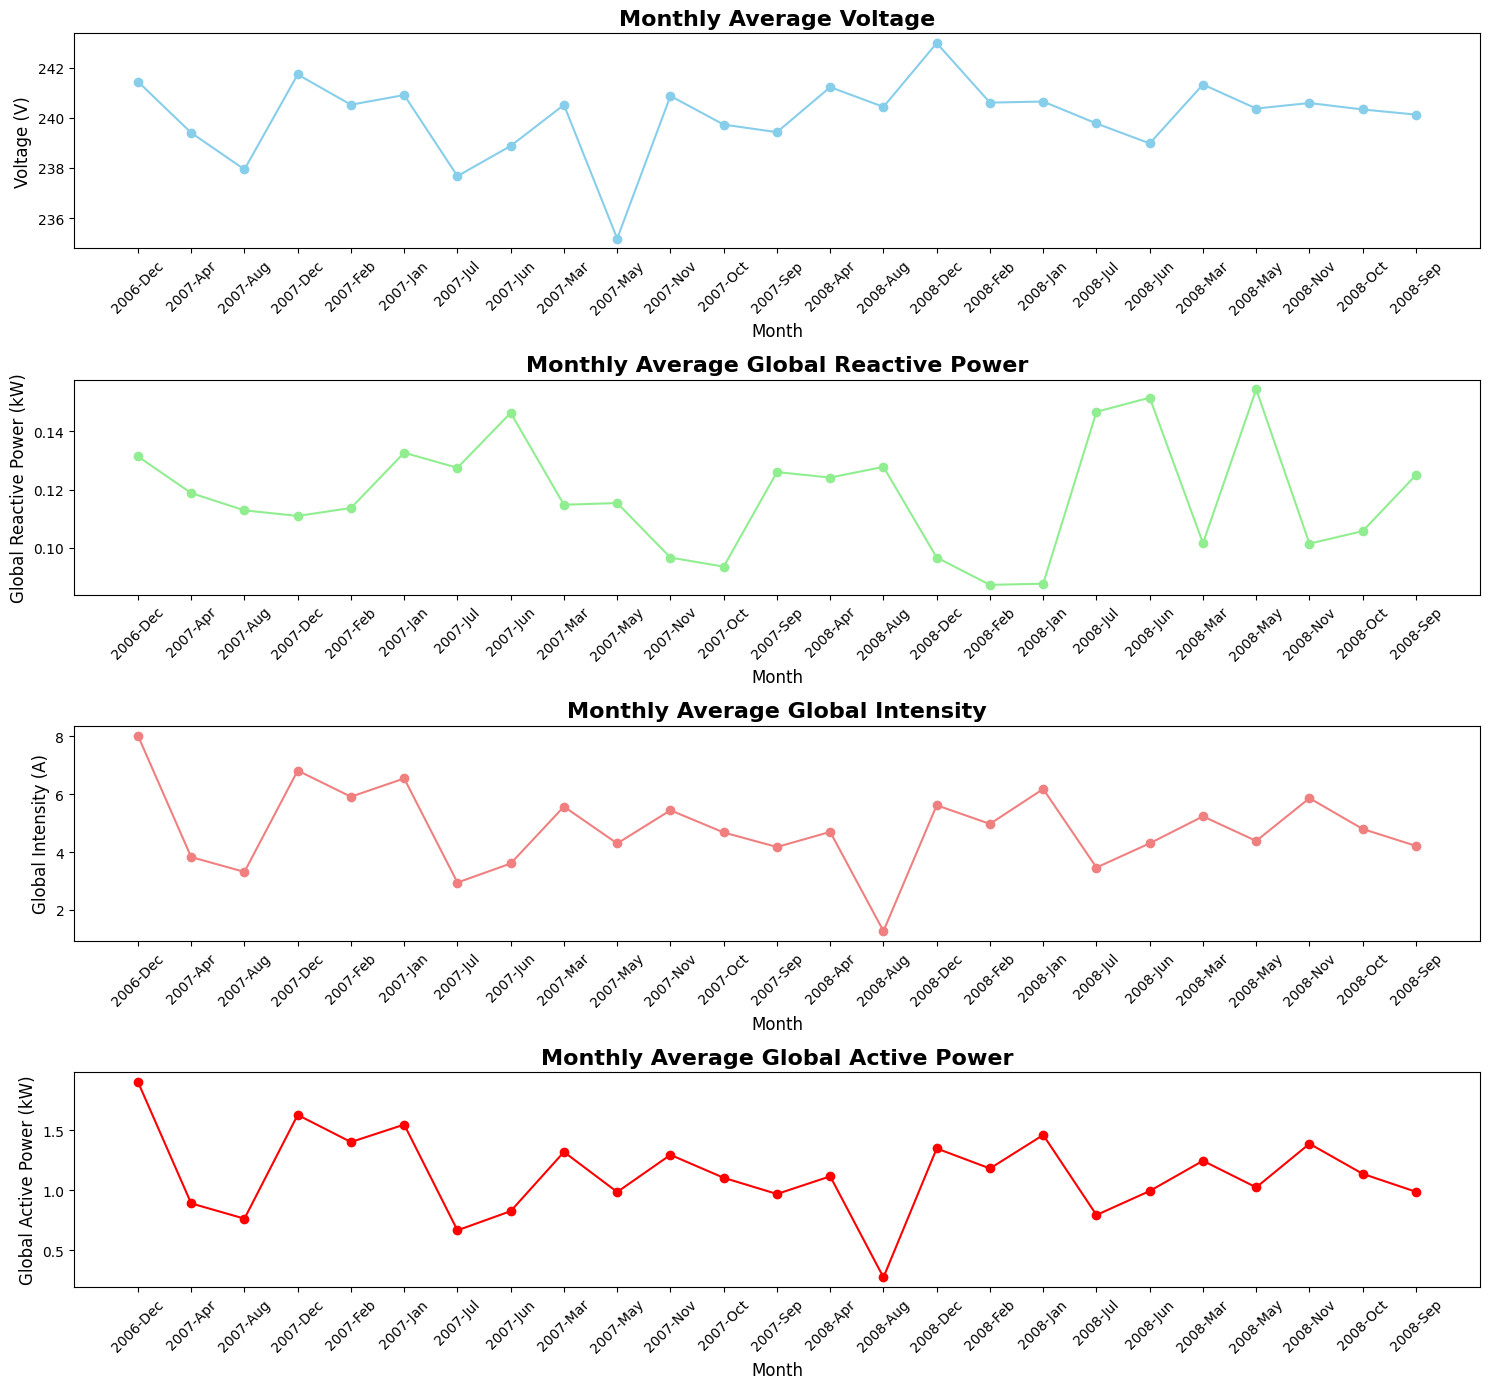

In [51]:
# lets plot AIR Information: VOltage, Active Power, Reactive Power, Intensity for monthly trends
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 14))
monthly_voltage = data.groupby('year_month')['Voltage'].mean()
plot_monthly_data(
    meaned_data=monthly_voltage,
    col='Voltage (V)',
    title='Monthly Average Voltage',
    color='skyblue',
    subplot_position=411
)

# Plot Global Reactive Power
monthly_reactive_power = data.groupby('year_month')['Global_reactive_power'].mean()
plot_monthly_data(
    meaned_data=monthly_reactive_power,
    col='Global Reactive Power (kW)',
    title='Monthly Average Global Reactive Power',
    color='lightgreen',
    subplot_position=412
)



# Plot Global Intensity
monthly_intensity = data.groupby('year_month')['Global_intensity'].mean()
plot_monthly_data(
    meaned_data=monthly_intensity,
    col='Global Intensity (A)',
    title='Monthly Average Global Intensity',
    color='lightcoral',
    subplot_position=413
)

# Plot Global Active Power
monthly_active_power = data.groupby('year_month')['Global_active_power'].mean()
plot_monthly_data(
    meaned_data=monthly_active_power,
    col='Global Active Power (kW)',
    title='Monthly Average Global Active Power',
    color='red',
    subplot_position=414
)

plt.tight_layout()
plt.show()

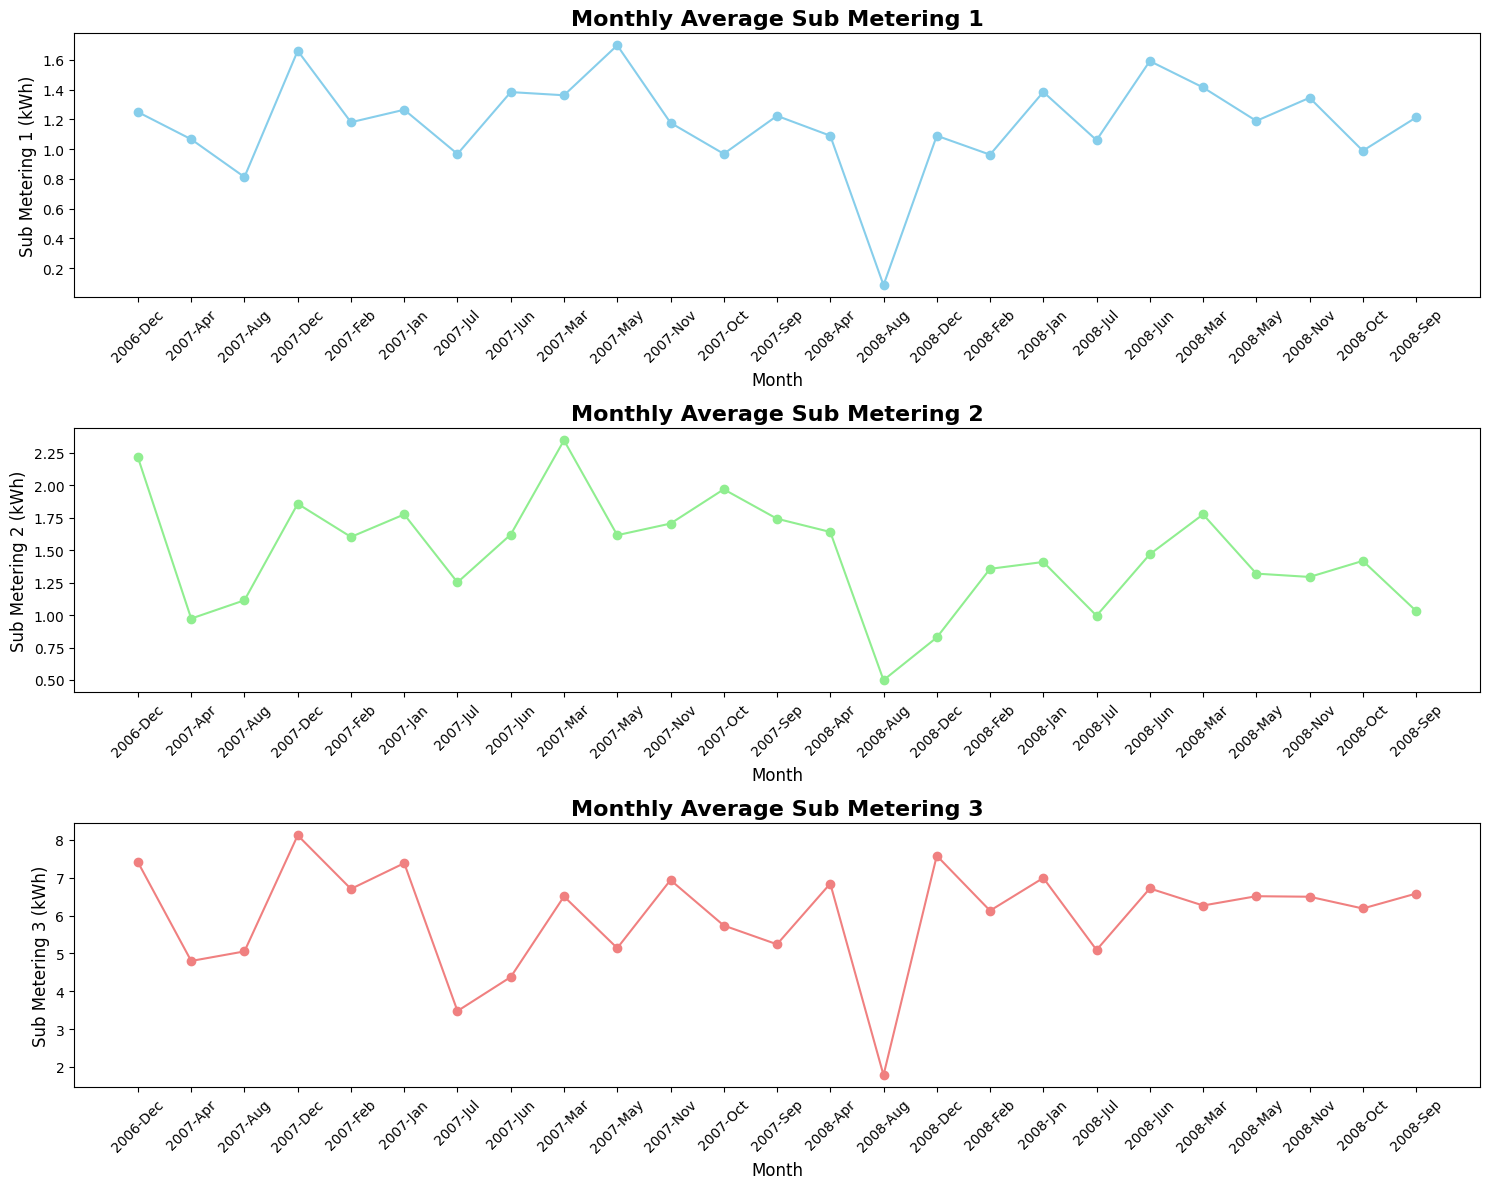

In [52]:
# do the same for SUB METERS
plt.figure(figsize=(15, 12))

# Sub_metering_1
Sub_metering_1 = data.groupby('year_month')['Sub_metering_1'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_1,
    col='Sub Metering 1 (kWh)',
    title='Monthly Average Sub Metering 1',
    color='skyblue',
    subplot_position=311
)

# Sub_metering_2
Sub_metering_2 = data.groupby('year_month')['Sub_metering_2'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_2,
    col='Sub Metering 2 (kWh)',
    title='Monthly Average Sub Metering 2',
    color='lightgreen',
    subplot_position=312
)

# Sub_metering_3
Sub_metering_3 = data.groupby('year_month')['Sub_metering_3'].mean()
plot_monthly_data(
    meaned_data=Sub_metering_3,
    col='Sub Metering 3 (kWh)',
    title='Monthly Average Sub Metering 3',
    color='lightcoral',
    subplot_position=313
)
plt.tight_layout()
plt.show()


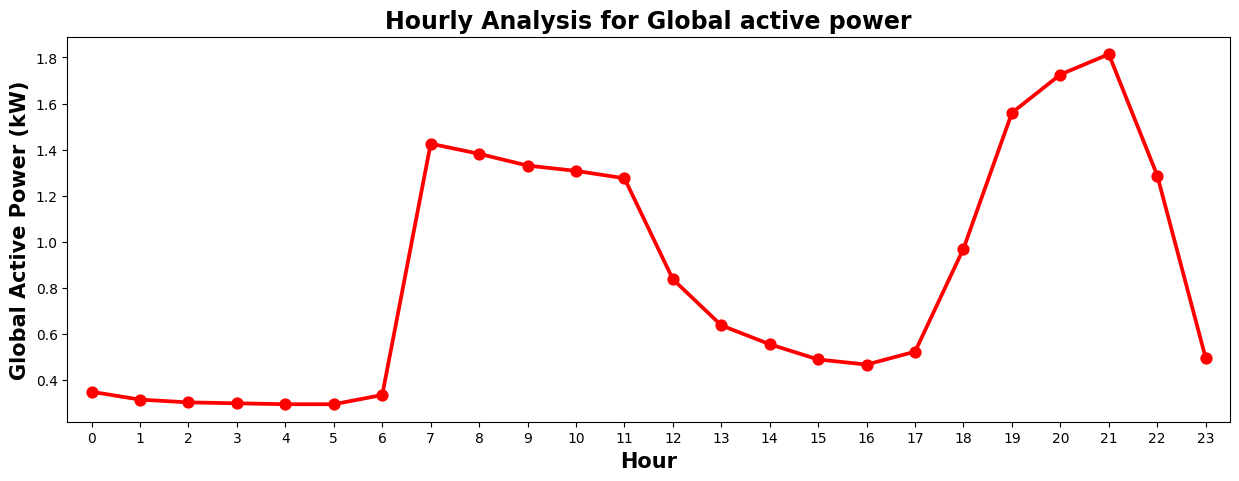

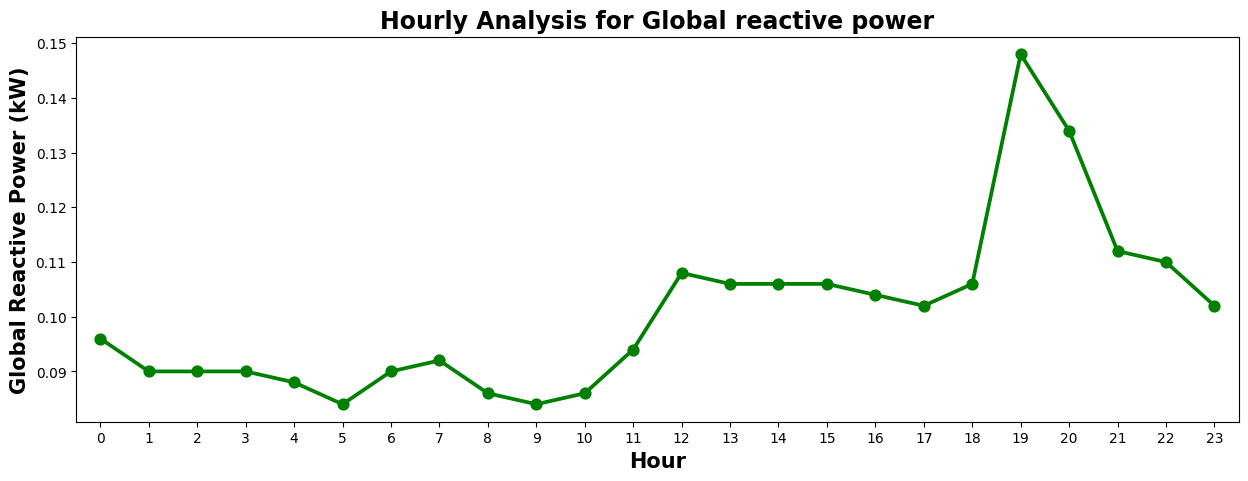

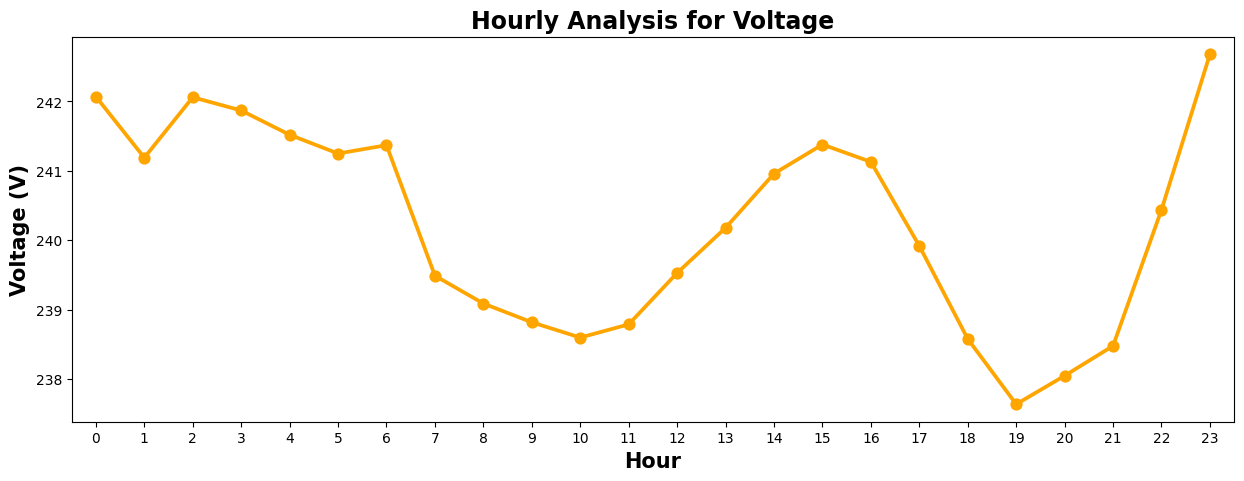

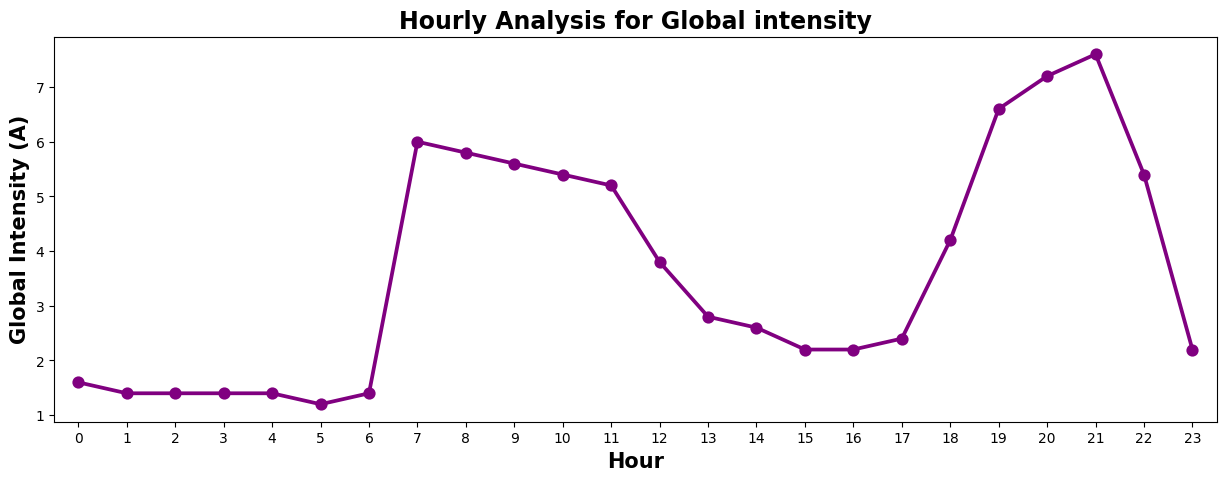

In [54]:
# do hour analysis of the energies
import seaborn as sns

colors = ['red', 'green', 'orange', 'purple', 'yellow', 'blue', 'cyan', 'magenta', 'gray', 'brown']
columns = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
y_labels = [
    'Global Active Power (kW)',
    'Global Reactive Power (kW)',
    'Voltage (V)',
    'Global Intensity (A)'
]

# create plots by medianed hour
for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=False)
    )
    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )

    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


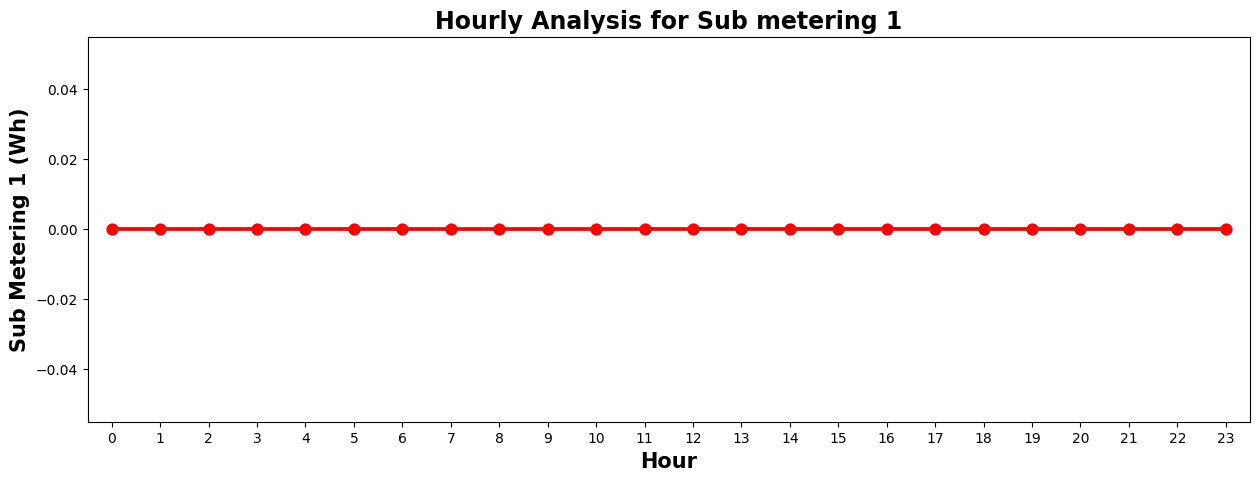

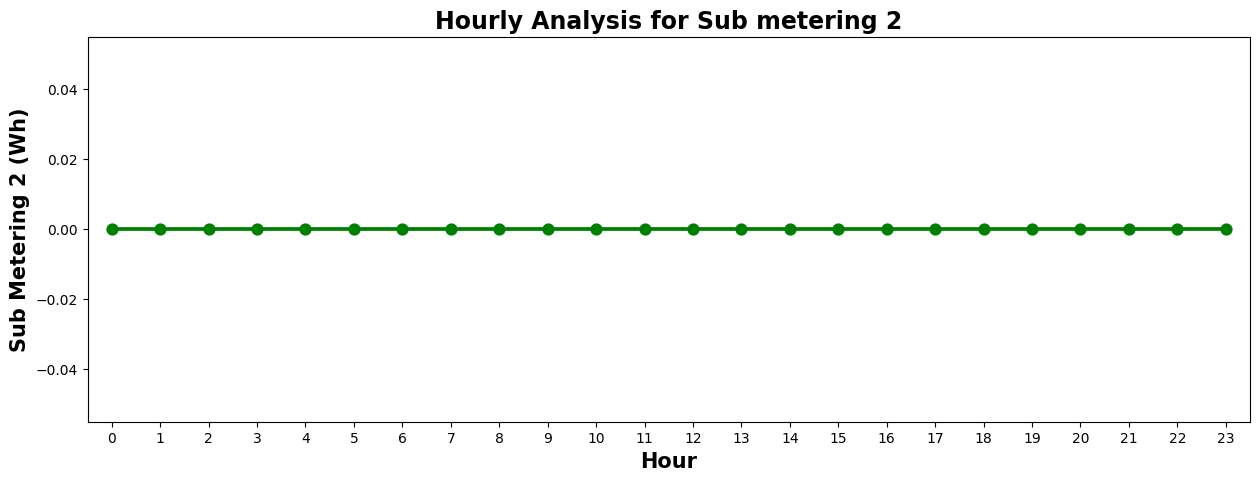

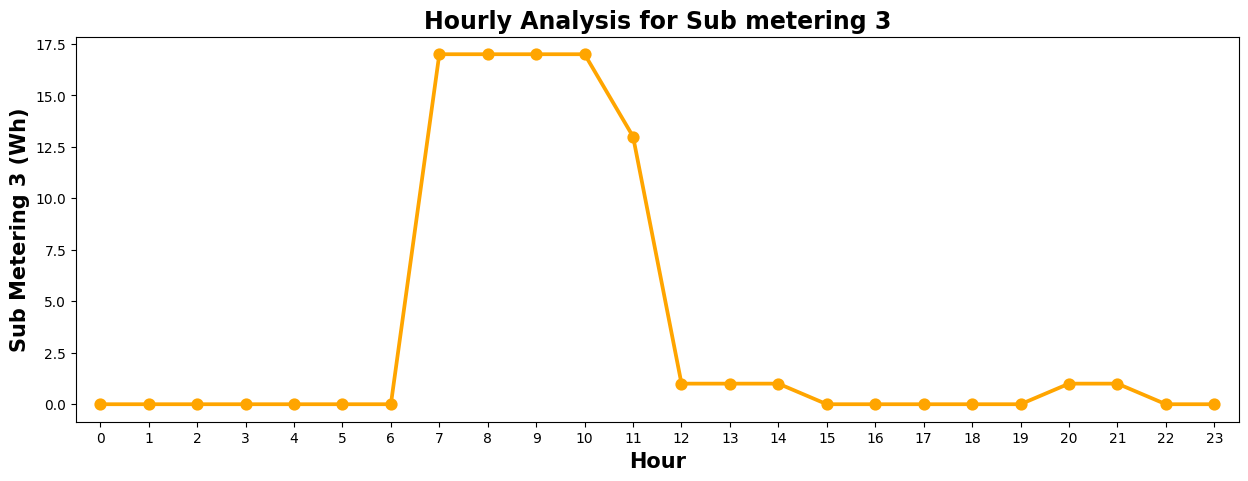

In [55]:
# BY sub meters
# cols for analysis (Sub_metering_1, Sub_metering_2, Sub_metering_3)
columns = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

y_labels = [
    'Sub Metering 1 (Wh)',
    'Sub Metering 2 (Wh)',
    'Sub Metering 3 (Wh)'
]

for i, column in enumerate(columns):
    data_hr = (
        data[[column, 'hour']]
        .groupby(["hour"])
        .median()
        .reset_index()
        .sort_values(by='hour', ascending=True)
    )

    f, ax = plt.subplots(figsize=(15, 5))
    sns.pointplot(
        x='hour',
        y=column,
        data=data_hr,
        markers='o',
        color=colors[i % len(colors)]
    )
    plt.title(f"Hourly Analysis for {column.replace('_', ' ').capitalize()}", fontweight='bold', fontsize=17)
    plt.xlabel("Hour", fontweight='bold', fontsize=15)
    plt.ylabel(y_labels[i], fontweight='bold', fontsize=15)

    plt.show()


In [56]:
df.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'datetime', 'month', 'year', 'day', 'hour',
       'dayofyear', 'dayname', 'year_month'],
      dtype='object')

<ipython-input-57-741d728198b4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False)
<ipython-input-57-741d728198b4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False)
<ipython-input-57-741d728198b4>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False)
<ipython-input-57-741d728198b4>:26: FutureWarning: 

Passing

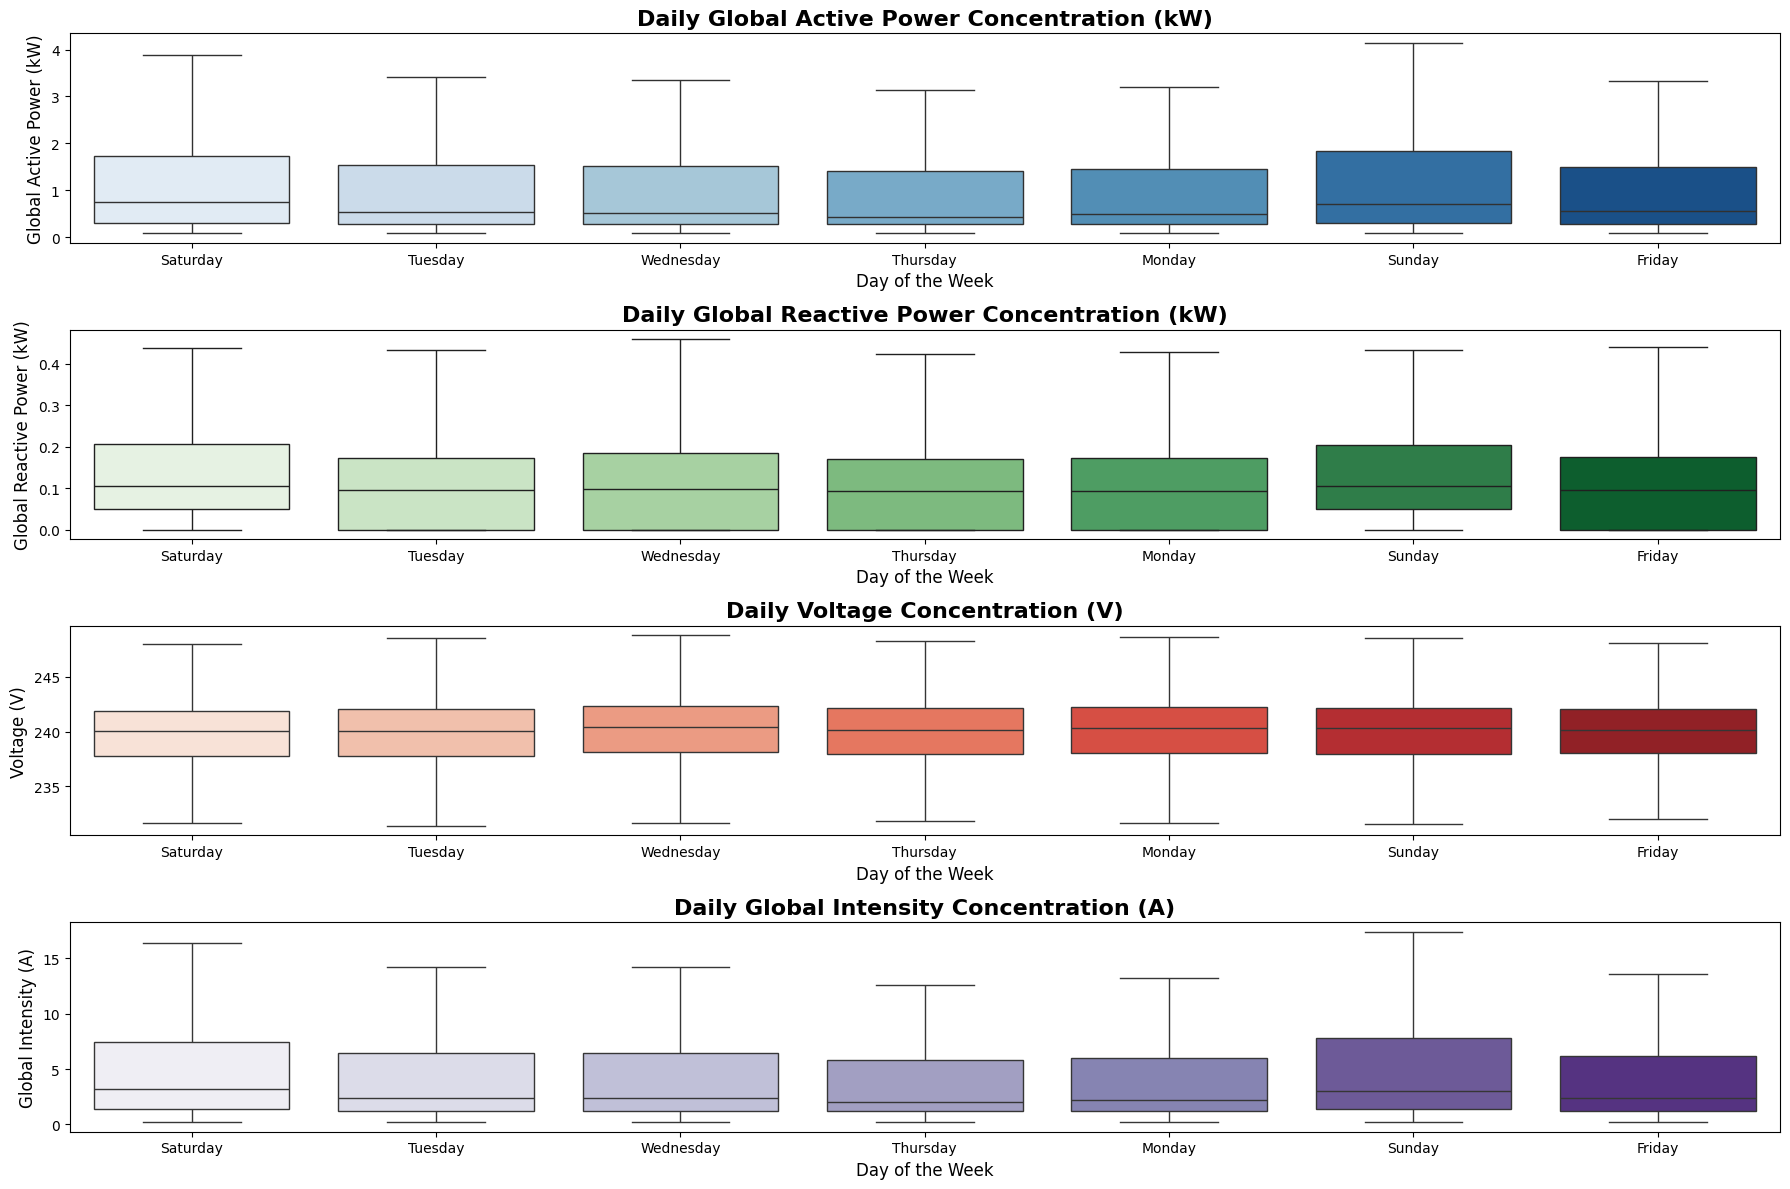

In [57]:
plt.figure(figsize=(18, 12))

# Global Active Power plot
plt.subplot(4, 1, 1)
sns.boxplot(x='dayname', y='Global_active_power', data=data, palette='Blues', showfliers=False)
plt.title('Daily Global Active Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Active Power (kW)', fontsize=12)

# Global Reactive Power plot
plt.subplot(4, 1, 2)
sns.boxplot(x='dayname', y='Global_reactive_power', data=data, palette='Greens', showfliers=False)
plt.title('Daily Global Reactive Power Concentration (kW)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Reactive Power (kW)', fontsize=12)

# Voltage plot
plt.subplot(4, 1, 3)
sns.boxplot(x='dayname', y='Voltage', data=data, palette='Reds', showfliers=False)
plt.title('Daily Voltage Concentration (V)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Voltage (V)', fontsize=12)

# Global Intensity plot
plt.subplot(4, 1, 4)
sns.boxplot(x='dayname', y='Global_intensity', data=data, palette='Purples', showfliers=False)
plt.title('Daily Global Intensity Concentration (A)', fontsize=16, fontweight='bold')
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Global Intensity (A)', fontsize=12)

plt.tight_layout()
plt.show()


<ipython-input-58-7ec88bd022b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
<ipython-input-58-7ec88bd022b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
<ipython-input-58-7ec88bd022b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
<ipython-input-58-7ec88bd022b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is dep

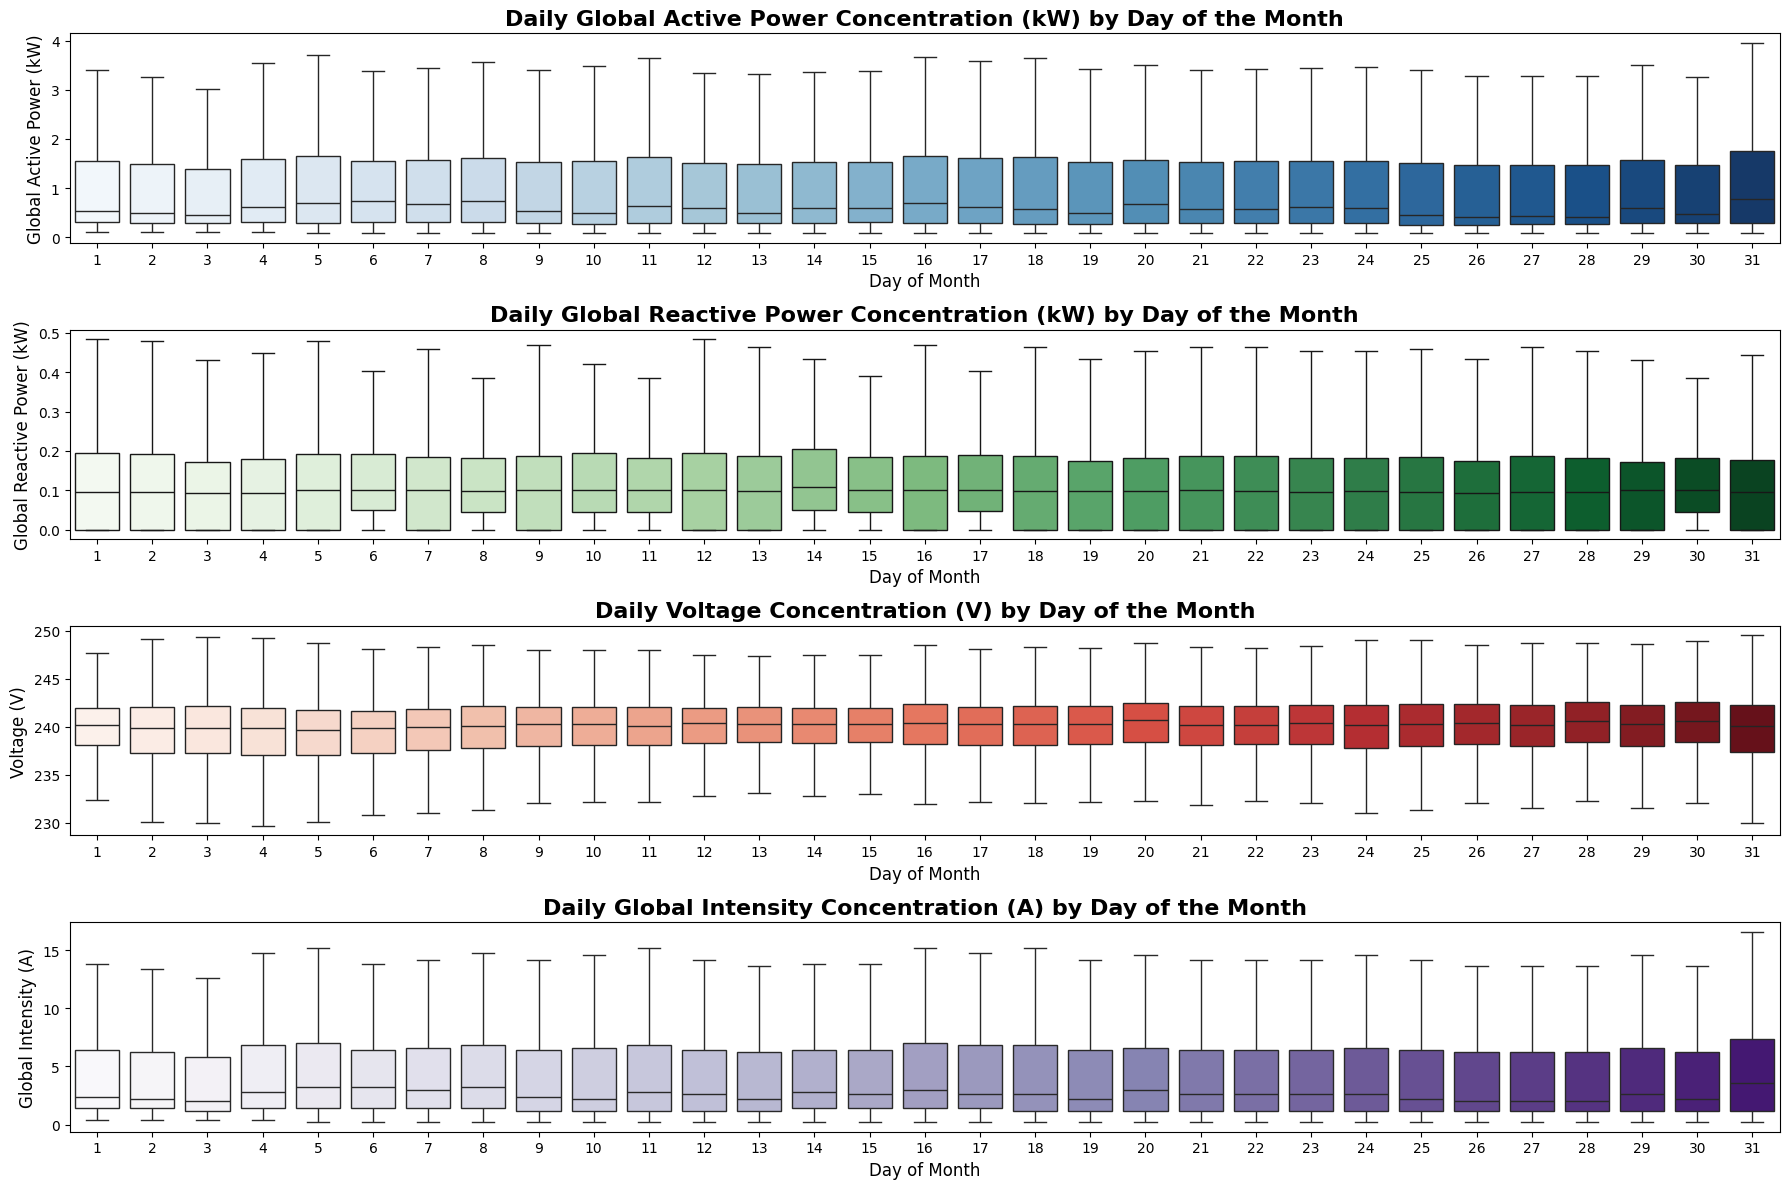

In [58]:
# grouping bu date of month
def plot_boxplot_by_group(data, group_col, y_col, title, palette, ylabel):
    sns.boxplot(x=group_col, y=y_col, data=data, palette=palette, showfliers=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel('Day of Month', fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.tight_layout()

# Boxplots for day of the month (day) - grouped by day of the month
plt.figure(figsize=(18, 12))
plt.subplot(4, 1, 1)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_active_power',
    title='Daily Global Active Power Concentration (kW) by Day of the Month',
    palette='Blues',
    ylabel='Global Active Power (kW)'
)
plt.subplot(4, 1, 2)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_reactive_power',
    title='Daily Global Reactive Power Concentration (kW) by Day of the Month',
    palette='Greens',
    ylabel='Global Reactive Power (kW)'
)
plt.subplot(4, 1, 3)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Voltage',
    title='Daily Voltage Concentration (V) by Day of the Month',
    palette='Reds',
    ylabel='Voltage (V)'
)
plt.subplot(4, 1, 4)
plot_boxplot_by_group(
    data=data,
    group_col='day',
    y_col='Global_intensity',
    title='Daily Global Intensity Concentration (A) by Day of the Month',
    palette='Purples',
    ylabel='Global Intensity (A)'
)

plt.tight_layout()
plt.show()